# Lista 8 (10 pkt.)

In [48]:
import numpy as np
import matplotlib.pyplot as plt

## Zadanie 1 (2 pkt.)

Napisz funkcję **gen(a,b,p)**, która generuje listę punktów reprezentujących krzywą eliptyczną nad $\mathbb{Z}_p$ o równaniu $y^2=(x^3+ax+b)\mod p$.

In [49]:
def gen(a,b,p):
    res = []
    for x in range(p):
        r = (x**3 +( a * x) + b) % p

        for y in range(p):
            if (y * y) % p == r:
                res.append([x,y])

    return res

In [50]:
print(gen(-1,0,7)==[[0, 0], [1, 0], [4, 2], [4, 5], [5, 1], [5, 6], [6, 0]])
print(gen(-1,0,11)==[[0, 0], [1, 0], [4, 4], [4, 7], [6, 1], [6, 10], [8, 3], [8, 8], [9, 4], [9, 7], [10, 0]])
print(gen(-1,1,7)==[[0, 1], [0, 6], [1, 1], [1, 6], [2, 0], [3, 2], [3, 5], [5, 3], [5, 4], [6, 1], [6, 6]])
print(gen(0,2,5)==[[2, 0], [3, 2], [3, 3], [4, 1], [4, 4]])

True
True
True
True


## Zadanie 2 (2 pkt.)

Napisz funkcję **add(P,Q,a,p)**, która dodaje do siebie punkty $P$ i $Q$ na krzywej eliptycznej nad ciałem $\mathbb{Z}_p$ z parametrem $a$. Wykorzystaj wzory z wykładu.

$$x_3 = \left(s^2-x_1-x_2\right) \mod p$$
$$y_3 = \left(s\left(x_1-x_3\right)-y_1 \right) \mod p$$

$$s=\frac{y_2-y_1}{x_2-x_1} \mod p \quad P\neq Q$$
$$s=\frac{3x_1^2+a}{2y_1} \mod p \quad P=Q$$

$(x_3, y_3)$ to współrzędne punktu będącego sumą punktów $(x_1, y_1)$ i $(x_2, y_2)$. Natomiast $a$ to współczynnik z równania krzywej.

Uwaga 1: wszystkie operacje w tych wzorach są na ciele $\mathbb{Z}_p$ zatem tam gdzie mamy dzielenie mamy tak naprawdę mnożenie przez odwrotność w tym ciele, wykorzystaj tutaj funkcję **inv** z poprzedniej listy, może być potrzeba ją nieco zmodyfikować, ponieważ może się tu pojawić dzielenie przez zero, które daje nam punkt "w nieskończości" (na wykładzie: $\mathcal{O}$).

Uwaga 2: Uwzględnij również, że zarówno w wyniku dodawania jak i w argumentach dodawanie może pojawić się punkt "w nieskończoności", zwracaj go jako **nan**, tj. za pomocą **float('nan')**, do sprawdzania czy coś jest **nan** użyj **np.isnan()**.

In [51]:
def egcd(a, b):
    x0, y0 = 1, 0
    x1, y1 = 0, 1
    while b != 0:
        if b == 0:
            return 0,0,0, True
        q = a // b
        a, b = b, a % b
        x0, x1 = x1, x0 - q * x1
        y0, y1 = y1, y0 - q * y1

    return a, x0, y0, False


def inv(p, n):
    g, x, y, isInf = egcd(p, n)
    if isInf or g!=1:
        return float("nan")
    return x % n

In [52]:
def add(P, Q, a, p):
    if np.isnan(P[0]):
        return Q
    if np.isnan(Q[0]):
        return P

    if P == Q:
        num = (3 * P[0] ** 2 + a) % p
        den = (2 * P[1]) % p
    else:
        num = (Q[1] - P[1]) % p
        den = (Q[0] - P[0]) % p

    inv_den = inv(den, p)
    if np.isnan(inv_den):
        return [float("nan"), float("nan")]

    s = (num * inv_den) % p

    x3 = (s * s - P[0] - Q[0]) % p
    y3 = (s * (P[0] - x3) - P[1]) % p

    return [x3, y3]


In [53]:
print(add([4,2],[5,1],-1,7)==[6,0])
print(add([4,2],[4,2],-1,7)==[1,0])
print(add([4,2],[5,1],-1,7)==[6,0])
print(add([4,2],[float('nan'),float('nan')],-1,7)==[4,2])
print(np.isnan(add([float('nan'),float('nan')],[float('nan'),float('nan')],-1,7)))
print(np.isnan(add([0,0],[0,0],-1,7)))
print(add([2,0],[3,2],0,5)==[4,1])
print(np.isnan(add([2,0],[2,0],0,5)))

True
True
True
True
[ True  True]
[ True  True]
True
[ True  True]


W oparciu o poprzednią funkcję napisz funkcję **multiply(n,P,a,p)**, która mnoży punkt $P$ razy liczbę naturalną $n$ na krzywej eliptycznej nad ciałem $\mathbb{Z}_p$ z parametrem $a$, tzn. dodaje ten punkt do siebie $n$ razy.

In [54]:
import numpy as np


def multiply(n, P, a, p):
    result = P

    for i in range(n-1):
        result = add(result, P, a, p)

    return result


In [55]:
print(multiply(1,[4,2],-1,7)==[4,2])
print(multiply(1,[4,2],-1,7)==[4,2])
print(multiply(3,[4,2],-1,7)==[4,5])
print(np.isnan(multiply(4,[4,2],-1,7)))
print(np.isnan(multiply(2,[float('nan'),float('nan')],-1,7)))
print(multiply(5,[2,0],0,5)==[2,0])
print(multiply(5,[3,3],0,5)==[3,2])

True
True
True
[ True  True]
[ True  True]
True
True


## Zadanie 3 (2 pkt.)

Narysuj na wykresie punkty (**plt.scatter()**) reprezentujące krzywą eliptyczną. Stosując funkcję **multiply()** przeanalizuj jaką grupę generuje każdy z punktów tej krzywej, wypisz te grupy. Nie automatyzuj tego, tzn. operacje na punktach wykonuj stosując wcześniejsze funkcje ale analizę poszczególnych grup przeprowadź ręcznie.

Na przykład dla krzywej $y^2=x^3+1$ nad ciałem $\mathbb{Z}_5$ mamy 5 punktów (łącznie z punktem w nieskończoności, którego nie ma na wykresie, 6 punktów):

<img src="figord6.png" width="500"/>

Punkt $P_0$ generuje trójelementową grupę:

{$P_0,P_1,\mathcal{O}$},

bo $2P_0=P_1$, i $3P_0=\mathcal{O}$.

Punkt $P_1$ generuje tą samą grupę:

{$P_1,P_0,\mathcal{O}$}

bo $2P_1=P_0,3P_1=\mathcal{O}$. 

Analogicznie punkty $P_2$ i $P_3$ generują grupę {$P_2,P_1,P_4,P_0,P_3,\mathcal{O}$}, oraz punkt $P_4$ generuje grupę {$P_4,\mathcal{O}$}. Na tej krzywej mamy zatem określone trzy grupy: pięcioelementową, trójelementową i dwuelementową.

Przeprowadź podobną analizę dla przykładów:
1. krzywa nad ciałem $\mathbb{Z}_7$ o równaniu $y^2=x^3-x$
2. krzywa nad ciałem $\mathbb{Z}_5$ o równaniu $y^2=x^3+4x$
   
Sprawdź, że powyższe krzywe są nioeosobliwe.


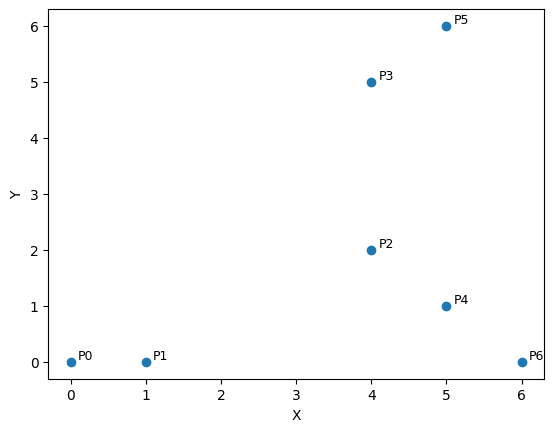

In [56]:
A = gen(-1,0,7)
x_vals = [p[0] for p in A]
y_vals = [p[1] for p in A]

plt.scatter(x_vals, y_vals)
plt.ylabel("Y")
plt.xlabel("X")
for i, (x, y) in enumerate(A):
    plt.text(x+0.3, y, f"P{i}", fontsize=9, ha="right", va="bottom")
plt.show()

In [57]:
a = -1
p = 7
print("P0:")
print(multiply(2,A[0], a,p))
print("punkt w nieskonczoności, P0 generuje {P0, inf}")
print("\nP1:")
print(multiply(2, A[1], a, p))
print("punkt w nieskonczoności, P1 generuje {P1, inf}")
print("\nP2:")
print(multiply(2, A[2], a, p))
print(multiply(3, A[2], a, p))
print(multiply(4, A[2], a, p))
print("punkt w nieskonczoności, P2 generuje {P2, P1, P3, inf}")
print("\nP3:")
print(multiply(2, A[3], a, p))
print(multiply(3, A[3], a, p))
print(multiply(4, A[3], a, p))
print("punkt w nieskonczoności, P3 generuje {P3, P1, P2, inf}")
print("\nP4:")
print(multiply(2, A[4], a, p))
print(multiply(3, A[4], a, p))
print(multiply(4, A[4], a, p))
print("punkt w nieskonczoności, P4 generuje {P4, P1, P5, inf}")
print("\nP5:")
print(multiply(2, A[5], a, p))
print(multiply(3, A[5], a, p))
print(multiply(4, A[5], a, p))
print("punkt w nieskonczoności, P5 generuje {P5, P1, P4, inf}")
print("\nP6:")
print(multiply(2, A[6], a, p))
print("punkt w nieskonczoności, P6 generuje {P6, inf}")


P0:
[nan, nan]
punkt w nieskonczoności, P0 generuje {P0, inf}

P1:
[nan, nan]
punkt w nieskonczoności, P1 generuje {P1, inf}

P2:
[1, 0]
[4, 5]
[nan, nan]
punkt w nieskonczoności, P2 generuje {P2, P1, P3, inf}

P3:
[1, 0]
[4, 2]
[nan, nan]
punkt w nieskonczoności, P3 generuje {P3, P1, P2, inf}

P4:
[1, 0]
[5, 6]
[nan, nan]
punkt w nieskonczoności, P4 generuje {P4, P1, P5, inf}

P5:
[1, 0]
[5, 1]
[nan, nan]
punkt w nieskonczoności, P5 generuje {P5, P1, P4, inf}

P6:
[nan, nan]
punkt w nieskonczoności, P6 generuje {P6, inf}


pięc grup: 3x 2-rząd, 2x 4-rząd

### Warunek nie osobliwości 
4a^3 + 27b^2 != 0 mod p  
a = -1, b = 0  
4 (-1)^3 + 27*0^2 = -4  
-4 mod 7 = 3 != 0  krzywa jest niesoobliwa


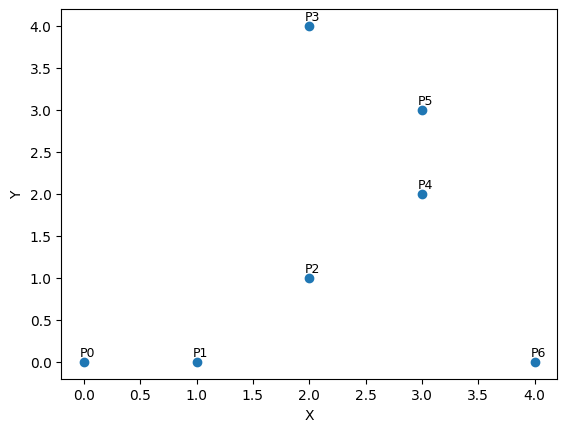

In [58]:
B = gen(4,0, 5)
x_vals = [p[0] for p in B]
y_vals = [p[1] for p in B]

plt.scatter(x_vals, y_vals)
plt.xlabel("X")
plt.ylabel("Y")
for i, (x, y) in enumerate(B):
    plt.text(x + 0.1, y + 0.03, f"P{i}", fontsize=9, ha="right", va="bottom")
plt.show()


In [59]:
a = 4
p = 5
print("P0:")
print(multiply(2, B[0], a, p))
print("punkt w nieskonczoności, P0 generuje {P0, inf}")
print("\nP1:")
print(multiply(2, B[1], a, p))
print("punkt w nieskonczoności, P1 generuje {P1, inf}")
print("\nP2:")
print(multiply(2, B[2], a, p))
print(multiply(3, B[2], a, p))
print(multiply(4, B[2], a, p))
print("punkt w nieskonczoności, P2 generuje {P0, P2, P3, inf}")
print("\nP3:")
print(multiply(2, B[3], a, p))
print(multiply(3, B[3], a, p))
print(multiply(4, B[3], a, p))
print("punkt w nieskonczoności, P3 generuje {P0, P2, P3, inf}")
print("\nP4:")
print(multiply(2, B[4], a, p))
print(multiply(3, B[4], a, p))
print(multiply(4, B[4], a, p))
print("punkt w nieskonczoności, P4 generuje {P0, P4, P5, inf}")
print("\nP5:")
print(multiply(2, B[5], a, p))
print(multiply(3, B[5], a, p))
print(multiply(4, B[5], a, p))
print("punkt w nieskonczoności, P5 generuje {P0, P4, P5, inf}")
print("\nP6:")
print(multiply(2, B[6], a, p))
print("punkt w nieskonczoności, P6 generuje {P6, inf}")

P0:
[nan, nan]
punkt w nieskonczoności, P0 generuje {P0, inf}

P1:
[nan, nan]
punkt w nieskonczoności, P1 generuje {P1, inf}

P2:
[0, 0]
[2, 4]
[nan, nan]
punkt w nieskonczoności, P2 generuje {P0, P2, P3, inf}

P3:
[0, 0]
[2, 1]
[nan, nan]
punkt w nieskonczoności, P3 generuje {P0, P2, P3, inf}

P4:
[0, 0]
[3, 3]
[nan, nan]
punkt w nieskonczoności, P4 generuje {P0, P4, P5, inf}

P5:
[0, 0]
[3, 2]
[nan, nan]
punkt w nieskonczoności, P5 generuje {P0, P4, P5, inf}

P6:
[nan, nan]
punkt w nieskonczoności, P6 generuje {P6, inf}


4* 4^3 != 0 mod 5  
256 != 0 mod 5  
PRAWDA  
=> krzywa nie jest osobliwa

## Zadanie 4 (1 pkt)

Sprawdź numerycznie, korzystając z funkcji **gen()**, twierdzenie Hassego. Sprawdź, że ze wzrostem liczby pierwszej $p$ dla krzywej o parametrach $a=-1$, $b=0$ liczba punktów na krzywej podąża za oszacowaniem $p+1-2\sqrt{p}\leq\#E\leq p+1+2\sqrt{p}$. Narysuj wykres $\#E(p)$ i proste o równaniach $p+1-2\sqrt{p}$ oraz $p+1+2\sqrt{p}$.

Uwaga: Możesz wygenerować liczby pierwsze, np. w zakresie od 0 do 1000, za pomocą:

In [60]:
from sympy import primerange
primes = list(primerange(0,1000))

lub jakkolwiek inaczej.

In [61]:
curve_y = []
lower_bound_y = []
upper_bound_y = []
is_outside_bounds = False
for p in primes:
    curve = gen(-1,0,p)
    y = len(curve)
    p_sqrt_2 = 2* np.sqrt(p)
    lower_y = p+ 1- 2*p_sqrt_2
    upper_y = p + 1 + 2 * p_sqrt_2
    if y > upper_y or y < lower_y:
        print(f"Dla p={p} liczba punktów na krzywej wykracza poza zakres [{lower_y}, {upper_y}]")
        is_outside_bounds = True
    curve_y.append(y)
    lower_bound_y.append(lower_y)
    upper_bound_y.append(upper_y)
    
if is_outside_bounds:
    print("Twierdzenie nie spełnione wykryto punkty poza zakresem")
else:
    print("Twierdzenie spełnione")

Twierdzenie spełnione


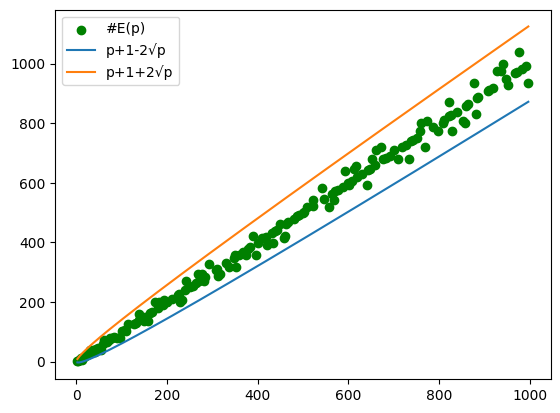

In [62]:
plt.scatter(primes, curve_y,c="green")
plt.plot(primes, lower_bound_y)
plt.plot(primes, upper_bound_y)
plt.legend(['#E(p)', 'p+1-2√p', 'p+1+2√p'])
plt.show()

## Zadanie 5 (2 pkt.)

Napisz funkcję **ord(G,a,p)** znajdującą rząd punktu $G$ na krzywej o parametrach $a$, $p$ (oznaczenia jak w poprzednich zadaniach). Rząd elementu to $n$ takie, że $nG=\mathcal{O}$. Znajdź punkt na krzywej o parametrach $a=-1$,$b=0$,$p=97$ o największym rzędzie, moze ich być więcej niż jeden, wybierz którykolwiek.

In [76]:
def ord(G,a,p):
    # curve = gen(a,0,p)
    # if G not in curve:
    #     print(curve)
    #     print(G)
    #     return -1
    
    order = 1
    cur = G
    while not all(np.isnan(cur)):
        order += 1
        cur = multiply(order, G, a, p)
        
    return order

In [77]:
print(ord([4,4],-1,11)==3)
print(ord([8,8],-1,11)==6)
print(ord([3,2],-1,7)==3)  # Te punkty wgle nie leżą na krzywej
print(ord([3,5],-1,7)==3)  # Te punkty wgle nie leżą na krzywej
print(ord([3,2],0,5)==3)  # Te punkty wgle nie leżą na krzywej
print(ord([0,0],0,5)==2)

True
True
True
True
True
True


In [78]:
a = -1
b = 0
p = 97
curve = gen(a,b,p)
maxP = max(curve, key=lambda x: ord(x, a, p))
print(maxP)
print(f"Punkt rzędu: {ord(maxP,a ,p)}")

[6, 4]
Punkt rzędu: 20


## Zadanie 6 (1 pkt)

Prześledź działanie protokołu Diffiego-Helmana, jednak tym razem opertego o krzywe eliptyczne, i uzupełnij poszczególne kroki.

Alicja i Bob ustalają publicznie krzywą eliptyczą (czyli parametry $a$, $b$, $p$) w której będą działać oraz punkt na tej krzywej $G$. Weź krzywą z poprzedniego zadania oraz znaleziony w nim punkt.

In [66]:
a = -1
b = 0
G = maxP
p = 97

Alicja wybiera losową liczbę naturalną $n$ z przedziału $[2,\#E-1]$, $\#E$ to liczba punktów na krzywej:

In [67]:
points = len(curve)
print(f"#E: {points}")
n= np.random.randint(2,points-1)
n

#E: 79


77

Następnie oblicza $A=nG$ zgodnie z zasadami mnożenia punktów na krzywej przez liczbe naturalną:

In [68]:
A= multiply(n,G, a, p)
A

[70, 61]

To samo robi Bob, wybiera losową liczbę naturalną $m$ i oblicza $B=mG$:

In [69]:
m= np.random.randint(2, points-1)
B= multiply(m, G, a, p)
B

[0, 0]

Liczby $n$ i $m$ są znane tylko, odpowiednio, Alicji i Bobowi, natomiast $A$ oraz $B$ są wymieniane publicznym kanałem. Bob otrzymuje $A$ i wykonuje operację $k_B=mA$, z kolei Alicja otrzymuje $B$ i wykonuje operację $k_A=nB$:

In [70]:
k_B= multiply(m, A, a, p)
k_A= multiply(n, B, a, p)

In [71]:
print(f"{k_A} == {k_B}")
k_A==k_B

[0, 0] == [0, 0]


True

Zawuażmy, że $k_A=k_B$, wynika to z tego, że $k_A=nB=nmG$ oraz $k_B=mA=mnG$ a oczywiście $nm=mn$. Zatem Alicja i Bob dysponują tą samą liczbą, którą mogą użyć jako klucz do szyfrowania. Publicznie znane są wartości $a$, $b$, $p$, $G$, $nG$ oraz $mG$, jednak odzyskanie z nich $n$ i $m$ jest bardzo trudne przy odpwiednim doborze krzywej i punktu na niej.